In [1]:
import os
import glob
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from bokeh.layouts import column

In [2]:
base_dir = '/Users/geo/london_bikes/London-bikes-analysis/'
year = "2018"
file = "{}_bikes.csv".format(year)
os.chdir(base_dir)

if os.path.exists(file):
    bikes_df = pd.read_csv(file)
else:
    weekly_files_dir = "data_{}".format(year)
    os.chdir('{}{}'.format('base_dir', 'weekly_files_dir'))
    files_names = [i for i in glob.glob('*.csv')]
    bikes_df = pd.concat([pd.read_csv(file) for file in files_names ]).reset_index(drop=True)
    bikes_df.to_csv( "../{}_bikes.csv".format(year), index=False, encoding='utf-8')

bikes_df.drop(['EndStation Logical Terminal'], axis=1, inplace=True)

In [3]:
bikes_df.columns = ['bike_id',
                    'duration',
                    'end_date',
                    'endstation_id',
                    'endstation_name',
                    'rental_id',
                    'start_date',
                    'startstation_id',
                    'startstation_name']

bikes_df['start_date'] = pd.to_datetime(bikes_df['start_date'], format = '%d/%m/%Y %H:%M')
bikes_df['end_date'] = pd.to_datetime(bikes_df['end_date'], format = '%d/%m/%Y %H:%M')
bikes_df = bikes_df.drop(bikes_df[bikes_df.start_date.dt.year != 2018].index)

In [4]:
print("--- Bike trips dataset:\n", bikes_df.head(5), "\n",
      "--- Shape:\n", bikes_df.shape, "\n",
      "--- Columns:\n", bikes_df.dtypes, "\n")
print("--- Number of bike trips:\n", len(bikes_df))

--- Bike trips dataset:
    bike_id  duration            end_date  endstation_id  \
0     7457      1620 2018-03-10 12:41:00          807.0   
1    10899       180 2018-03-07 15:14:00          446.0   
2     4813      1020 2018-03-08 13:57:00          159.0   
3     8307       240 2018-03-09 08:57:00          578.0   
4     8433       240 2018-03-13 07:00:00          578.0   

                         endstation_name  rental_id          start_date  \
0  Bevington Road West, North Kensington   73768697 2018-03-10 12:14:00   
1               York Hall, Bethnal Green   73703818 2018-03-07 15:11:00   
2         Great Marlborough Street, Soho   73729421 2018-03-08 13:40:00   
3       Hollybush Gardens, Bethnal Green   73749828 2018-03-09 08:53:00   
4       Hollybush Gardens, Bethnal Green   73822143 2018-03-13 06:56:00   

   startstation_id                    startstation_name  
0              647        Richmond Way, Shepherd's Bush  
1              722         Finnis Street, Bethnal Gre

Text(0.5, 1.0, '... the month')

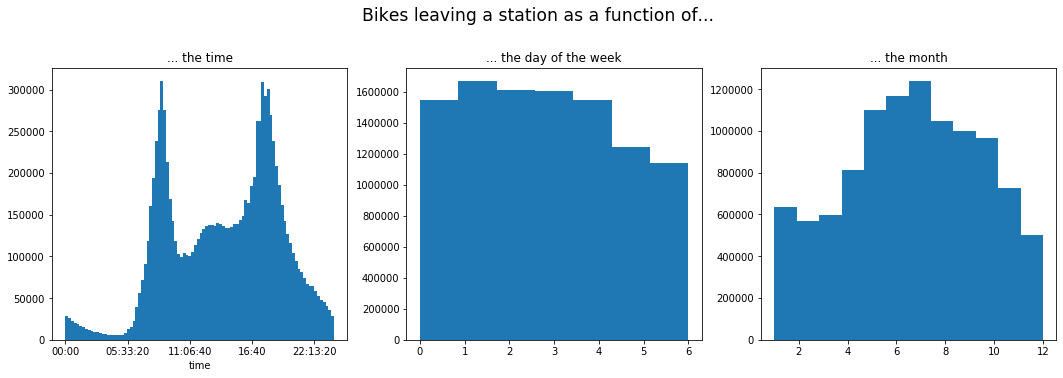

In [5]:
#Bikes leaving a station as a function of... time!

#set up fig and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
plt.suptitle('Bikes leaving a station as a function of...', x=0.5, y=1.05, ha='center', fontsize='xx-large')

axes[0].hist(bikes_df['start_date'].dt.time, bins=96)
axes[0].set_title('... the time')
axes[1].hist(bikes_df['start_date'].dt.weekday, bins=7)
axes[1].set_title('... the day of the week')
axes[2].hist(bikes_df['start_date'].dt.month, bins=12)
axes[2].set_title('... the month')

Text(0.5, 1.0, 'Weekend')

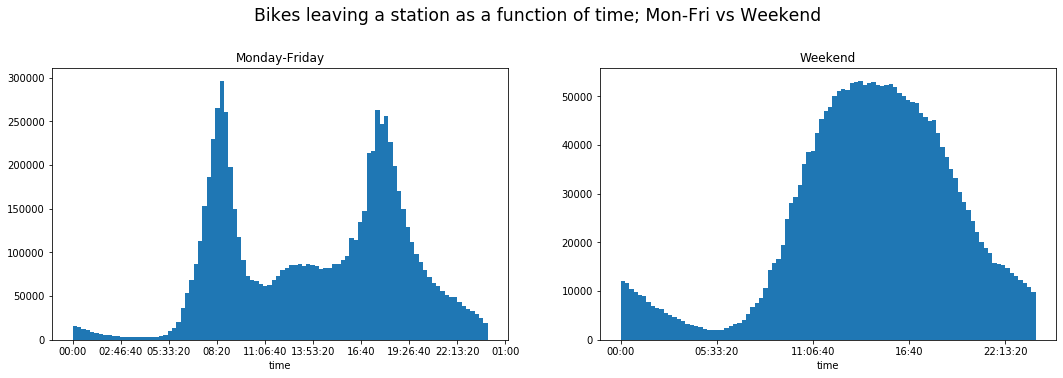

In [6]:
#Bikes leaving a station as a function of... the hour of the day!
#Comparing work daysand weekends

work_days_series = bikes_df[bikes_df['start_date'].dt.weekday.isin([0,1,2,3,4])].start_date.dt.time
weekend_series = bikes_df[bikes_df['start_date'].dt.weekday.isin([5,6])].start_date.dt.time

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,5))
plt.suptitle('Bikes leaving a station as a function of time; Mon-Fri vs Weekend',
             x=0.5,
             y=1.05,
             ha='center',
             fontsize='xx-large')

axes[0].hist(work_days_series, bins=96)
axes[0].locator_params(axis='x', nbins=12)
axes[0].set_title('Monday-Friday')
axes[1].hist(weekend_series, bins=96)
axes[1].set_title('Weekend')

Mean duration:  1193.4120593588907
Standard deviation:  3469.0947234395408
Median duration:  840.0


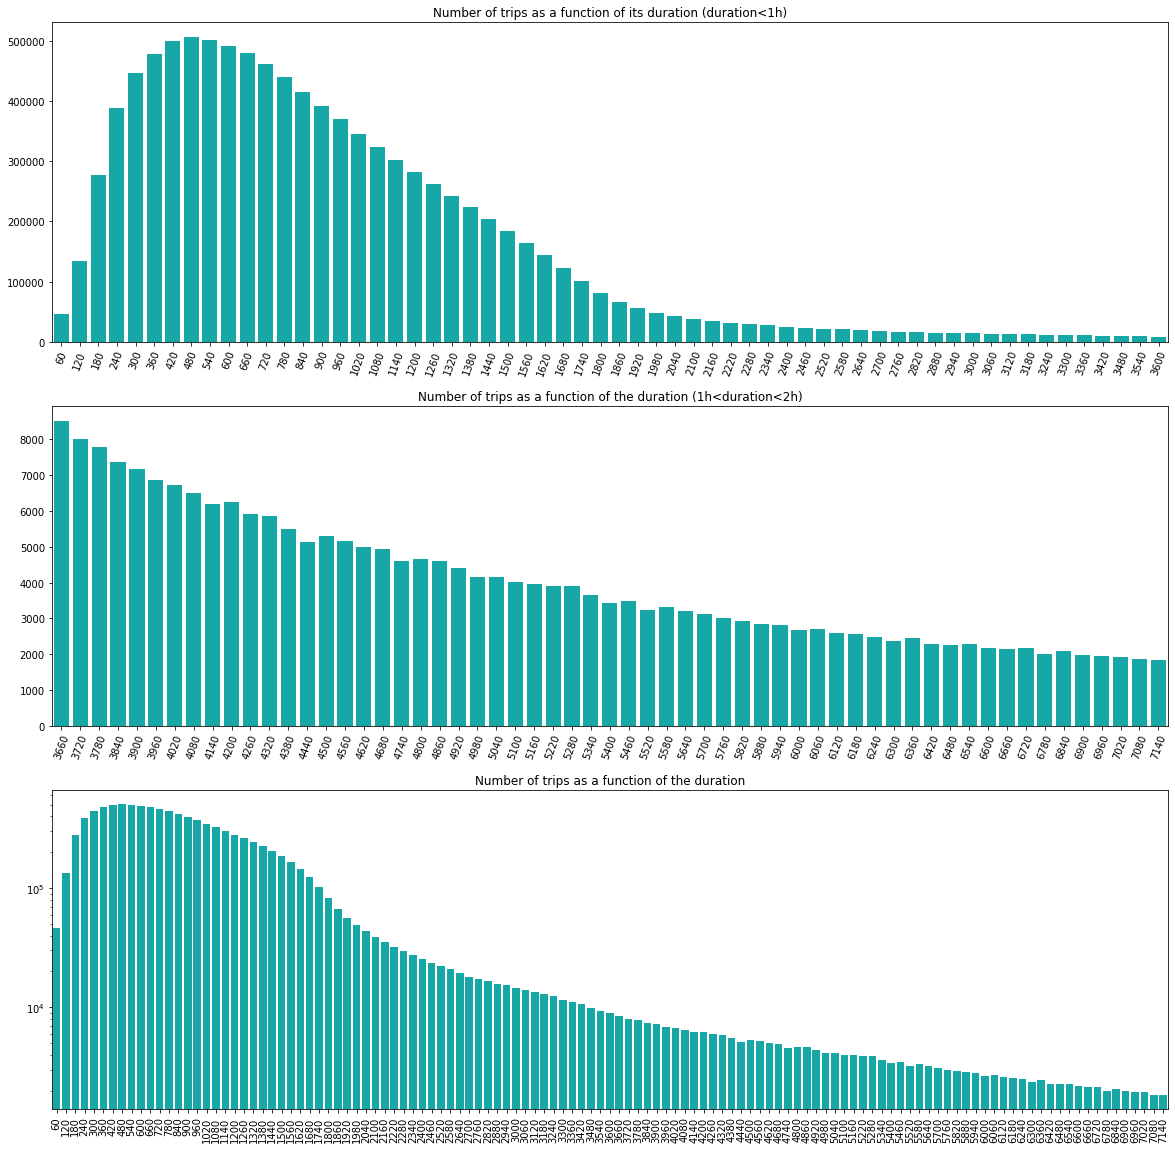

In [7]:
#Number of trips as a function of the duration
print("Mean duration: ", bikes_df['duration'].mean())
print("Standard deviation: ", bikes_df['duration'].std())
print("Median duration: ", bikes_df['duration'].median())

fig, axes = plt.subplots(nrows=3, figsize=(20,20))

sns.countplot(data = bikes_df[bikes_df['duration'] <= 3600],
              x = 'duration',
              ax = axes[0],
              color = 'c').set_title('Number of trips as a function of its duration (duration<1h)', fontsize=12)

sns.countplot(data = bikes_df[(bikes_df['duration'] > 3600) & (bikes_df['duration'] < 7200)],
              x = 'duration',
              ax = axes[1],
              color = 'c').set_title('Number of trips as a function of the duration (1h<duration<2h)', fontsize=12)

#the "whole" thing (actually all the trips with duration<7200s) on a log scale just for good measure
sns.countplot(data = bikes_df[bikes_df['duration'] < 7200],
              x = 'duration',
              ax = axes[2],
              color = 'c').set_title('Number of trips as a function of the duration', fontsize=12)
axes[0].xaxis.set_label_text("")
axes[0].yaxis.set_label_text("")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)
axes[1].xaxis.set_label_text("")
axes[1].yaxis.set_label_text("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)
axes[2].xaxis.set_label_text("")
axes[2].yaxis.set_label_text("")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
axes[2].set_yscale("log")
plt.show()

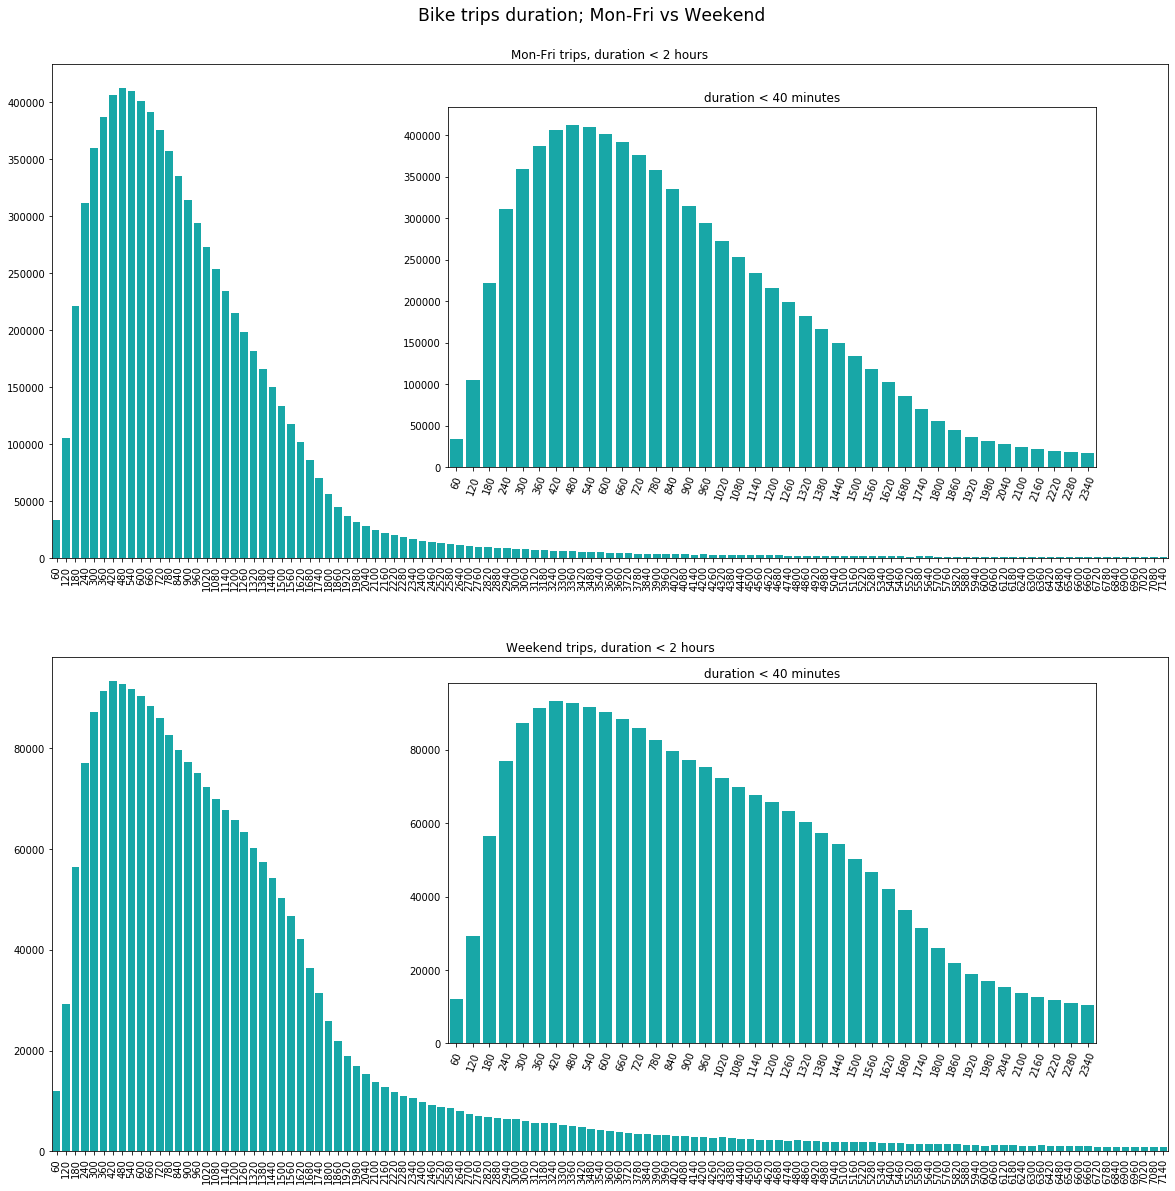

In [8]:
fig, axes = plt.subplots(nrows=2, figsize=(20,20))
plt.suptitle('Bike trips duration; Mon-Fri vs Weekend',
             x=0.5,
             y=0.92,
             ha='center',
             fontsize='xx-large')

# TOP plots
## Mon-Fri: duration < 2 hours
sns.countplot(data = bikes_df[(bikes_df['duration'] < 7200) & (bikes_df['start_date'].dt.weekday.isin([0,1,2,3,4]))],
              x = 'duration',
              ax = axes[0],
              color = 'c').set_title('Mon-Fri trips, duration < 2 hours', fontsize=12)
axes[0].xaxis.set_label_text("")
axes[0].yaxis.set_label_text("")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

## Mon-Fri: duration < 40 minutes
left0, bottom0, width0, height0 = [0.4, 0.6, 0.45, 0.25]
axes[0] = fig.add_axes([left0, bottom0, width0, height0], label='Week days')
sns.countplot(data = bikes_df[(bikes_df['duration'] < 2400) & (bikes_df['start_date'].dt.weekday.isin([0,1,2,3,4]))],
              x = 'duration',
              ax = axes[0],
              color = 'c').set_title('duration < 40 minutes', fontsize=12)


# BOTTOM plots
## Weekend: duration < 2 hours
sns.countplot(data = bikes_df[(bikes_df['duration'] < 7200) & (bikes_df['start_date'].dt.weekday.isin([5,6]))],
              x = 'duration',
              ax = axes[1],
              color = 'c').set_title('Weekend trips, duration < 2 hours', fontsize=12)
axes[1].xaxis.set_label_text("")
axes[1].yaxis.set_label_text("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

## Weekend: duration < 40 minutes
left1, bottom1, width1, height1 = [0.4, 0.2, 0.45, 0.25]
axes[1] = fig.add_axes([left1, bottom1, width1, height1], label='Weekend')
sns.countplot(data = bikes_df[(bikes_df['duration'] < 2400) & (bikes_df['start_date'].dt.weekday.isin([5,6]))],
              x = 'duration',
              ax = axes[1],
              color = 'c').set_title('duration < 40 minutes', fontsize=12)

axes[0].xaxis.set_label_text("")
axes[0].yaxis.set_label_text("")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=70)
axes[1].xaxis.set_label_text("")
axes[1].yaxis.set_label_text("")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=70)

plt.show()